In [188]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plotting
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

# stat models
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pmdarima as pm

# scikit-learn
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics as st
from sklearn.preprocessing import Imputer as SimpleImputer
from sklearn.metrics import mean_absolute_error

In [189]:
data = pd.read_csv('F://T2.csv',parse_dates=True,index_col='Date/Time')

In [190]:
data1=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='10min'))

In [191]:
data2 = data1.ffill().bfill()

In [192]:
#train =  pd.DataFrame(data2[:38200]['Wind Speed (m/s)'])
#rain.tail()

In [193]:
#test = pd.DataFrame(data2.iloc[38200:]['Windspeed'])
#test.tail()
data2.head()

Wind Speed (m/s)
2018-01-01 00:00:00          5.311336
2018-01-01 00:10:00          5.672167
2018-01-01 00:20:00          5.216037
2018-01-01 00:30:00          5.659674
2018-01-01 00:40:00          5.577941

In [194]:
train=data2[0:38200] 
test=data2[38200:]

In [195]:
train = train.resample('D').mean()

In [196]:
test = test.resample('D').mean()
test.head()

Wind Speed (m/s)
2018-09-23          5.847503
2018-09-24          7.067443
2018-09-25         11.822274
2018-09-26         14.551751
2018-09-27         11.823467

In [197]:
train.shape,test.shape
data2.shape

(52560, 1)

# Naive Forest Method


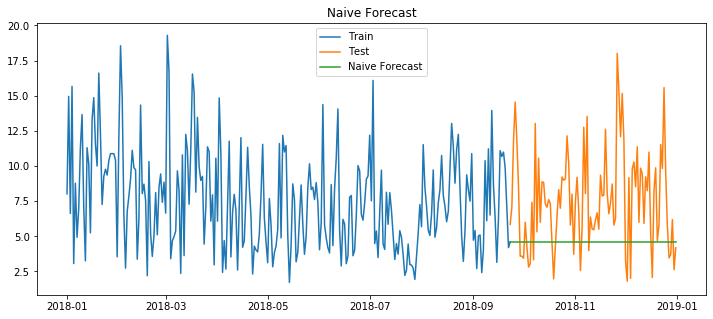

In [198]:
dd = np.asarray(train['Wind Speed (m/s)'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,5))
plt.plot(train.index,train['Wind Speed (m/s)'], label='Train')
plt.plot(test.index,test['Wind Speed (m/s)'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [199]:
naive = mean_squared_error(test['Wind Speed (m/s)'], y_hat['naive'])
rms = sqrt(naive)
print('MSE: ', naive, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 20.612661905131173 %
RMSE: 4.540116948398045


# Simple Average

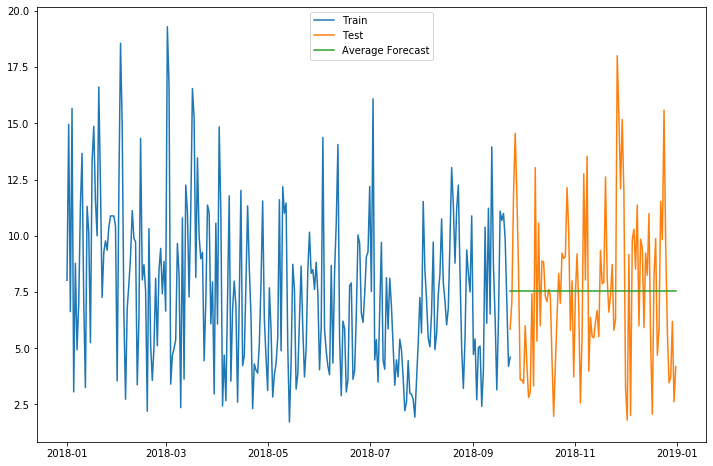

In [200]:
y_hat['avg_forecast'] = train['Wind Speed (m/s)'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Wind Speed (m/s)'], label='Train')
plt.plot(test['Wind Speed (m/s)'], label='Test')
plt.plot(y_hat['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [201]:
avg = mean_squared_error(test['Wind Speed (m/s)'], y_hat['avg_forecast'])
rms = sqrt(avg)
print('MSE: ', avg, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 11.54143287064376 %
RMSE: 3.3972684425349375


#  Moving Average

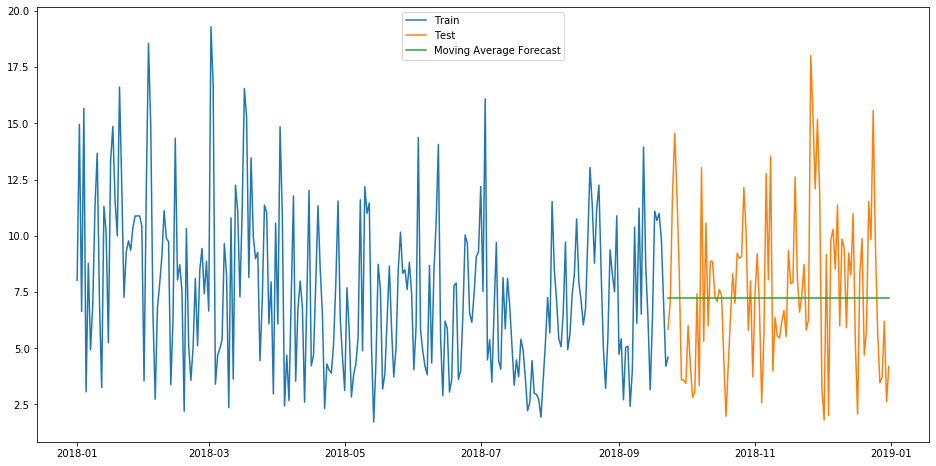

In [202]:
y_hat['moving_avg_forecast'] = train['Wind Speed (m/s)'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Wind Speed (m/s)'], label='Train')
plt.plot(test['Wind Speed (m/s)'], label='Test')
plt.plot(y_hat['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [203]:
mv_avg = mean_squared_error(test['Wind Speed (m/s)'], y_hat['moving_avg_forecast'])
rms = sqrt(mv_avg)
print('MSE: ', mv_avg, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 11.69312314922462 %
RMSE: 3.4195208946904567


# Simple Exponential Smoothing

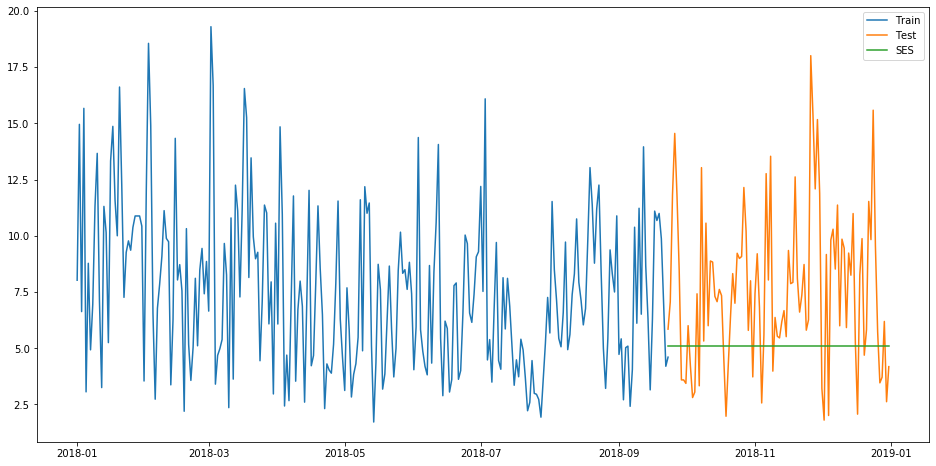

In [204]:

fit2 = SimpleExpSmoothing(np.asarray(train['Wind Speed (m/s)'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Wind Speed (m/s)'], label='Train')
plt.plot(test['Wind Speed (m/s)'], label='Test')
plt.plot(y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [205]:
ses = mean_squared_error(test['Wind Speed (m/s)'], y_hat['SES'])
rms = sqrt(ses)
print('MSE: ', ses, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 17.90371670769227 %
RMSE: 4.231278377475567


# Holt’s Linear Trend method

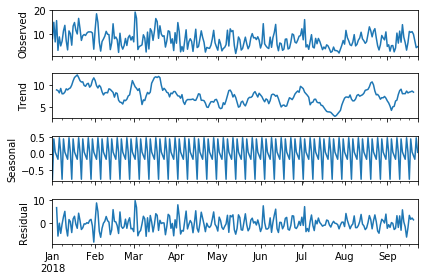

In [206]:
sm.tsa.seasonal_decompose(train['Wind Speed (m/s)']).plot()
result = sm.tsa.stattools.adfuller(train['Wind Speed (m/s)'])
plt.show()

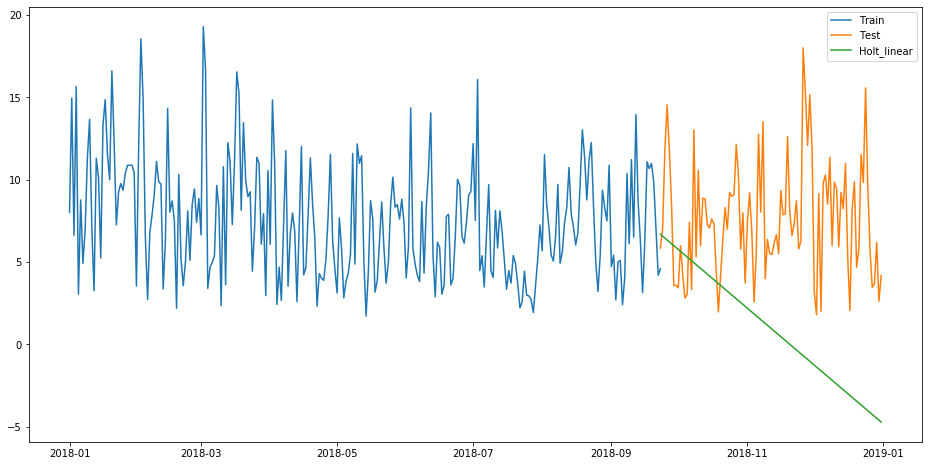

In [207]:
fit1 = Holt(np.asarray(train['Wind Speed (m/s)'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Wind Speed (m/s)'], label='Train')
plt.plot(test['Wind Speed (m/s)'], label='Test')
plt.plot(y_hat['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [208]:
lin = mean_squared_error(test['Wind Speed (m/s)'], y_hat['Holt_linear'])
rms = sqrt(lin)
print('MSE: ', lin, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 68.06670040817777 %
RMSE: 8.250254566265077


# Holt-Winters Method

F:\Anaconda\envs\tensorflow_cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



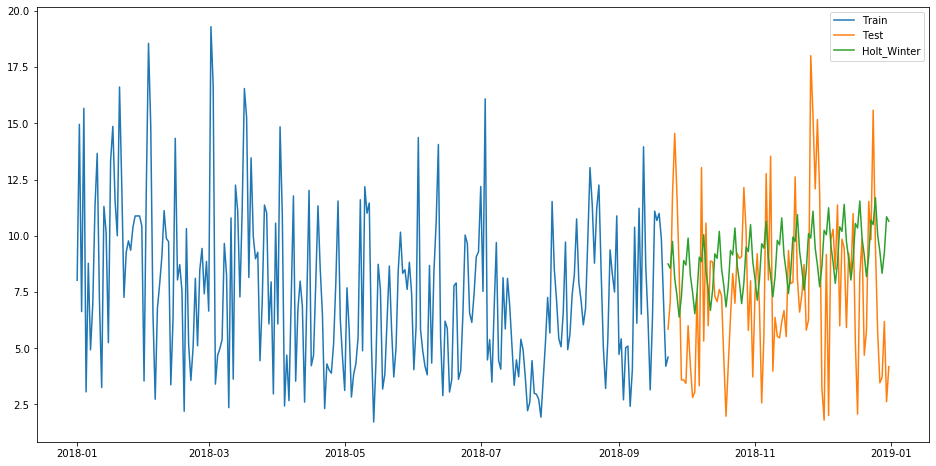

In [209]:
fit1 = ExponentialSmoothing(np.asarray(train['Wind Speed (m/s)']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Wind Speed (m/s)'], label='Train')
plt.plot(test['Wind Speed (m/s)'], label='Test')
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [210]:
win = mean_squared_error(test['Wind Speed (m/s)'], y_hat['Holt_Winter'])
rms = sqrt(win)
print('MSE: ', win, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 14.506937443631536 %
RMSE: 3.8087973749769803


# ARIMA

F:\Anaconda\envs\tensorflow_cpu\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

F:\Anaconda\envs\tensorflow_cpu\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



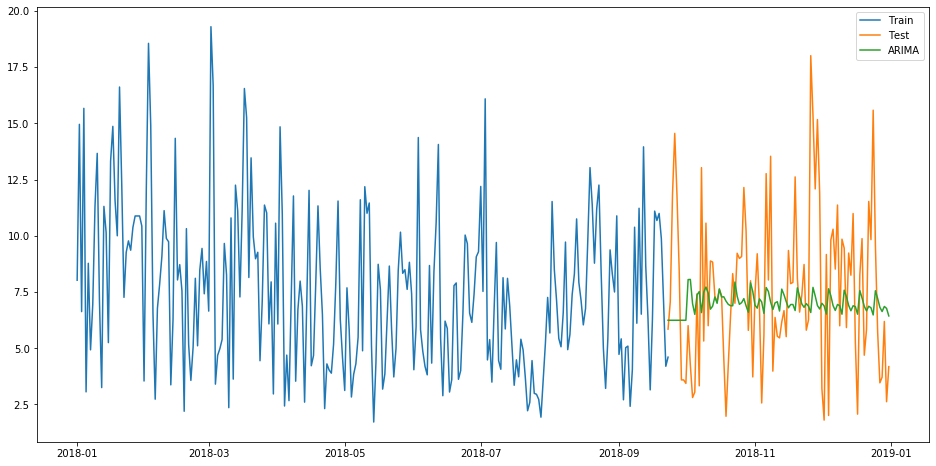

In [211]:
fit1 = sm.tsa.statespace.SARIMAX(train['Wind Speed (m/s)'], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat['ARIMA'] = fit1.predict(start="2018-10-01", end="2018-12-31", dynamic=True)
y_hat=y_hat.ffill().bfill()
plt.figure(figsize=(16,8))
plt.plot( train['Wind Speed (m/s)'], label='Train')
plt.plot(test['Wind Speed (m/s)'], label='Test')
plt.plot(y_hat['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [212]:
ar = mean_squared_error(test['Wind Speed (m/s)'], y_hat['ARIMA'])
rms = sqrt(ar)
print('MSE: ', ar, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 12.239115131372722 %
RMSE: 3.4984446731901766


In [213]:
y_hat.head()

Wind Speed (m/s)     naive  avg_forecast  moving_avg_forecast  \
2018-09-23          5.847503  4.603268      7.539977             7.219238   
2018-09-24          7.067443  4.603268      7.539977             7.219238   
2018-09-25         11.822274  4.603268      7.539977             7.219238   
2018-09-26         14.551751  4.603268      7.539977             7.219238   
2018-09-27         11.823467  4.603268      7.539977             7.219238   

                 SES  Holt_linear  Holt_Winter     ARIMA  
2018-09-23  5.092573     6.691310     8.748057  6.243441  
2018-09-24  5.092573     6.576121     8.549138  6.243441  
2018-09-25  5.092573     6.460933     9.746635  6.243441  
2018-09-26  5.092573     6.345744     8.098366  6.243441  
2018-09-27  5.092573     6.230555     7.344357  6.243441

In [214]:
from pylab import rcParams
rcParams['figure.figsize']=16,8

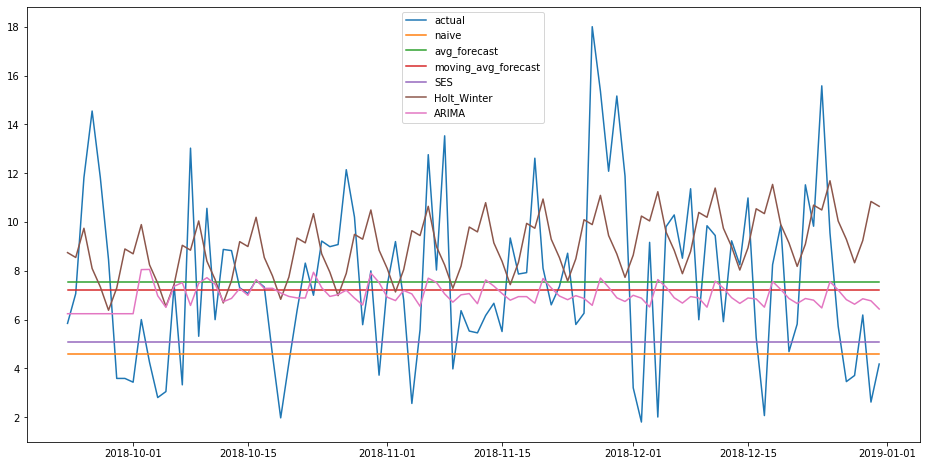

In [216]:
plt.plot(y_hat['Wind Speed (m/s)'],label='actual')
plt.plot(y_hat['naive'],label='naive')
plt.plot(y_hat['avg_forecast'],label='avg_forecast')
plt.plot(y_hat['moving_avg_forecast'],label='moving_avg_forecast')
plt.plot(y_hat['SES'],label='SES')
plt.plot(y_hat['Holt_Winter'],label='Holt_Winter')
plt.plot(y_hat['ARIMA'],label='ARIMA')

plt.legend(loc='best')
plt.show()